In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Bupa\Bupa_NW_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6
0,85.0,92.0,NaN,27.0,31.0,0.0
1,85.0,64.0,59.0,NaN,23.0,0.0
2,86.0,NaN,33.0,NaN,54.0,NaN
3,91.0,78.0,34.0,NaN,36.0,0.0
4,98.0,55.0,13.0,17.0,17.0,0.0
...,...,...,...,...,...,...
340,91.0,54.0,25.0,22.0,35.0,4.0
341,89.0,48.0,32.0,22.0,14.0,4.0
342,85.0,52.0,22.0,NaN,34.0,4.0
343,95.0,93.0,21.0,27.0,47.0,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	23
float64		column 2	33
float64		column 3	23
float64		column 4	44
float64		column 5	11
float64		column 6	67


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6
count,322.000000,312.000000,322.000000,301.000000,334.000000,278.000000
mean,90.198758,70.137821,30.487578,24.521595,38.607784,3.307554
std,4.392460,17.925451,19.534015,9.846676,39.553196,3.140198
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000
25%,88.000000,58.000000,20.000000,19.000000,15.000000,0.500000
50%,90.000000,67.000000,26.000000,23.000000,25.000000,3.000000
75%,92.000000,79.000000,34.000000,27.000000,46.750000,5.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000


<AxesSubplot:>

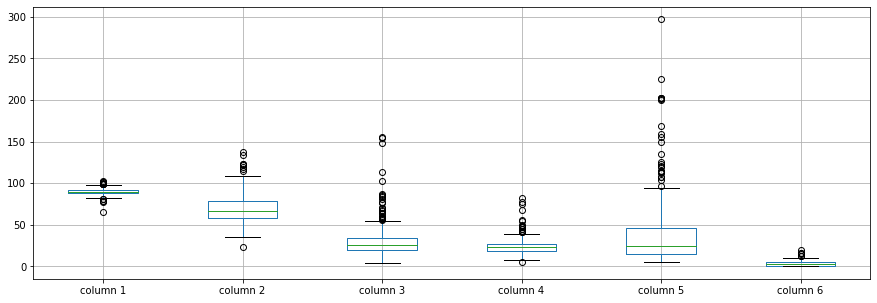

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:

df.mean()

column 1    90.198758
column 2    70.137821
column 3    30.487578
column 4    24.521595
column 5    38.607784
column 6     3.307554
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6
column 1,1.000000,0.062897,0.158423,0.214267,0.248951,0.258730
column 2,0.062897,1.000000,0.022497,0.129495,0.141493,0.108759
column 3,0.158423,0.022497,1.000000,0.713635,0.498887,0.150434
column 4,0.214267,0.129495,0.713635,1.000000,0.521057,0.194292
column 5,0.248951,0.141493,0.498887,0.521057,1.000000,0.320944
column 6,0.258730,0.108759,0.150434,0.194292,0.320944,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [25]:
imputer = md.Midas(layer_structure = [6,6+101,6+101+101,6+101+101+101,6+101+101+101+101,6+101+101+101,6+101+101,6+101,6], vae_layer = False, seed = 1010)
imputer.build_model(df)
imputer.train_model(training_epochs=101)


Size index: [6]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 260.9726860409691
Epoch: 1 , loss: 256.80247860863096
Epoch: 2 , loss: 258.21301923479353
Epoch: 3 , loss: 258.90162440708707
Epoch: 4 , loss: 257.80707586379276
Epoch: 5 , loss: 259.04361543201264
Epoch: 6 , loss: 260.86268833705356
Epoch: 7 , loss: 259.5954822358631
Epoch: 8 , loss: 258.70507957821803
Epoch: 9 , loss: 256.18709745861236
Epoch: 10 , loss: 253.86854044596353
Epoch: 11 , loss: 244.3011728922526
Epoch: 12 , loss: 236.80939229329428
Epoch: 13 , loss: 231.2397272019159
Epoch: 14 , loss: 223.82610212053572
Epoch: 15 , loss: 209.63961501348587
Epoch: 16 , loss: 210.2798323858352
Epoch: 17 , loss: 202.41673278808594
Epoch: 18 , loss: 200.017336890811
Epoch: 19 , loss: 198.25077747163317
Epoch: 20 , loss: 196.56260245186942
Epoch: 21 , loss: 190.5089372907366
Epoch: 22 , loss: 187.62325177873885
Epoch: 23 , loss: 187.71411932082404
Epoch: 24 , loss: 182.83572750999815
Epoch: 25 , loss: 183.5972

In [26]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(345, 6)

In [27]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    90.000000
column 2    74.308464
column 3    28.000000
column 4    15.000000
column 5    18.000000
column 6     0.500000
Name: 21, dtype: float64

In [28]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Bupa.xlsx', header=None,names=column_names)

In [29]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6
0,0.0,0.000000,-30.833612,0.000000,0.0,0.000000
1,0.0,0.000000,0.000000,-22.957681,0.0,0.000000
2,0.0,-13.823101,0.000000,0.557299,0.0,2.384857
3,0.0,0.000000,0.000000,-3.663656,0.0,0.000000
4,0.0,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...
340,0.0,0.000000,0.000000,0.000000,0.0,0.000000
341,0.0,0.000000,0.000000,0.000000,0.0,0.000000
342,0.0,0.000000,0.000000,15.569721,0.0,0.000000
343,0.0,0.000000,0.000000,0.000000,0.0,-2.491484


Calculating NRMSE Value

In [30]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [31]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [32]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

410.62732819320024

In [33]:
denominator=Frobenius_norm(complete_df)
denominator

2519.762091944396

In [34]:
NRMS=numerator/denominator
NRMS


0.16296273743698403

In [21]:
new_df.iloc[66,:]

column 1    86.000000
column 2    28.040174
column 3    20.000000
column 4    21.000000
column 5    16.000000
column 6     2.000000
Name: 66, dtype: float64

In [22]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6
0,85.0,92.000000,12.469196,27.000000,31.0,0.000000
1,85.0,64.000000,59.000000,28.929760,23.0,0.000000
2,86.0,43.955402,33.000000,21.477890,54.0,4.580350
3,91.0,78.000000,34.000000,29.136831,36.0,0.000000
4,98.0,55.000000,13.000000,17.000000,17.0,0.000000
...,...,...,...,...,...,...
340,91.0,54.000000,25.000000,22.000000,35.0,4.000000
341,89.0,48.000000,32.000000,22.000000,14.0,4.000000
342,85.0,52.000000,22.000000,44.284111,34.0,4.000000
343,95.0,93.000000,21.000000,27.000000,47.0,-0.515827


In [23]:
imputations[-1].to_excel("Bupa_NW_10(imp).xlsx", index=False, header=False)